# Importing the Libraries

In [65]:
import pandas as pd
from pandas import DataFrame
import urllib.request 
import urllib
import datetime 
import pandas_datareader.data as web
from pandas_datareader import data, wb
import json
import numpy as py
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
import plotly.graph_objs as go

# Reading the Data Breaches dataset cleaned for Lab 2

In [18]:
df = pd.read_excel('DatABreachesCleaned.xlsx')

In [57]:
df.head()

,Entity,Year,Records Lost,Organization,Method of Leak,Sensitivity,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0,"years are encoded (0=2004, 8 = 2012, 9 = 2013,...","(use 3m, 4m, 5m or 10m to approximate unknown ...",0,0,1. Just email address/Online information 20 SS...,NaN,NaN,NaN
1,AOL,2004,92000000,web,inside job,1,NaN,NaN,NaN
2,Automatic Data Processing,2005,125000,financial,poor security,20,NaN,NaN,NaN
3,Ameritrade Inc.,2005,200000,financial,lost / stolen device,20,NaN,NaN,NaN
4,Citigroup,2005,3900000,financial,lost / stolen device,300,NaN,NaN,NaN


In [20]:
! pip install fuzzywuzzy


# Cleaning the Row 0 having null values

In [22]:
df1 = df.drop(df.index[[0]])
df1.head()

,Entity,Year,Records Lost,Organization,Method of Leak,Sensitivity,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,AOL,2004,92000000,web,inside job,1,NaN,NaN,NaN
2,Automatic Data Processing,2005,125000,financial,poor security,20,NaN,NaN,NaN
3,Ameritrade Inc.,2005,200000,financial,lost / stolen device,20,NaN,NaN,NaN
4,Citigroup,2005,3900000,financial,lost / stolen device,300,NaN,NaN,NaN
5,Cardsystems Solutions Inc.,2005,40000000,financial,hacked,300,NaN,NaN,NaN


In [111]:


def get_symbol(name):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(name)
    
    result = json.load(urllib.urlopen(url))

    #result = requests.get(url).json()
    return result['ResultSet']['Query']

    my_list = df.Entity.T.tolist()
    for xyz in my_list:
        my_list_a=get_symbol(xyz)
    print(my_list_a)
 
        
    

In [37]:
symbols_list=['AOL', 'C', 'HPE','GPS', 'FNFV','SBUX']

start = datetime.datetime(2005, 1, 1)

end = datetime.datetime.today()

f = web.DataReader(symbols_list, 'yahoo', start, end)
    
close = f.to_frame()

C:\Users\MuhammadAdeel\Anaconda3\lib\site-packages\pandas_datareader\yahoo\daily.py:136: SymbolWarning: Failed to read symbol: 'AOL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [38]:
print (close)

                   Adj Close       Close        High         Low        Open  \
Date       minor                                                               
2005-01-03 C      393.000092  482.700012  490.000000  482.000000  490.000000   
           GPS     15.855183   20.969999   21.110001   20.850000   21.000000   
           SBUX    13.613945   15.285000   15.835000   15.142500   15.822500   
2005-01-04 C      389.661926  478.600006  487.700012  477.000000  482.799988   
           GPS     15.613241   20.650000   20.990000   20.540001   20.910000   
           SBUX    13.605036   15.275000   15.585000   15.227500   15.422500   
2005-01-05 C      394.546906  484.600006  487.799988  480.200012  480.500000   
           GPS     15.681289   20.740000   20.930000   20.530001   20.559999   
           SBUX    13.716370   15.400000   15.550000   15.155000   15.252500   
2005-01-06 C      398.373596  489.299988  492.399994  487.399994  488.000000   
           GPS     15.840067   20.950001

In [39]:
close.to_csv('Lab_3Companies.csv',encoding='utf-8')

# Accessing Equifax Stock Price

In [60]:
data_list=['EFX']

start = datetime.datetime(2015, 1, 1)

end = datetime.datetime.today()

g = web.DataReader(data_list, 'yahoo', start, end)
    
df4 = g.to_frame()

In [63]:
df4.head()

,,Adj Close,Close,High,Low,Open,Volume
Date,minor,,,,,,
2017-11-03,EFX,108.699997,108.699997,110.500000,108.639999,110.500000,939730.0
2017-11-02,EFX,108.919998,108.919998,110.339996,107.629997,110.089996,1240100.0
2017-11-01,EFX,109.800003,109.800003,111.290001,108.889999,109.120003,1438300.0
2017-10-31,EFX,108.529999,108.529999,110.320000,108.529999,108.989998,1041000.0
2017-10-30,EFX,109.010002,109.010002,109.389999,108.110001,109.000000,1165700.0


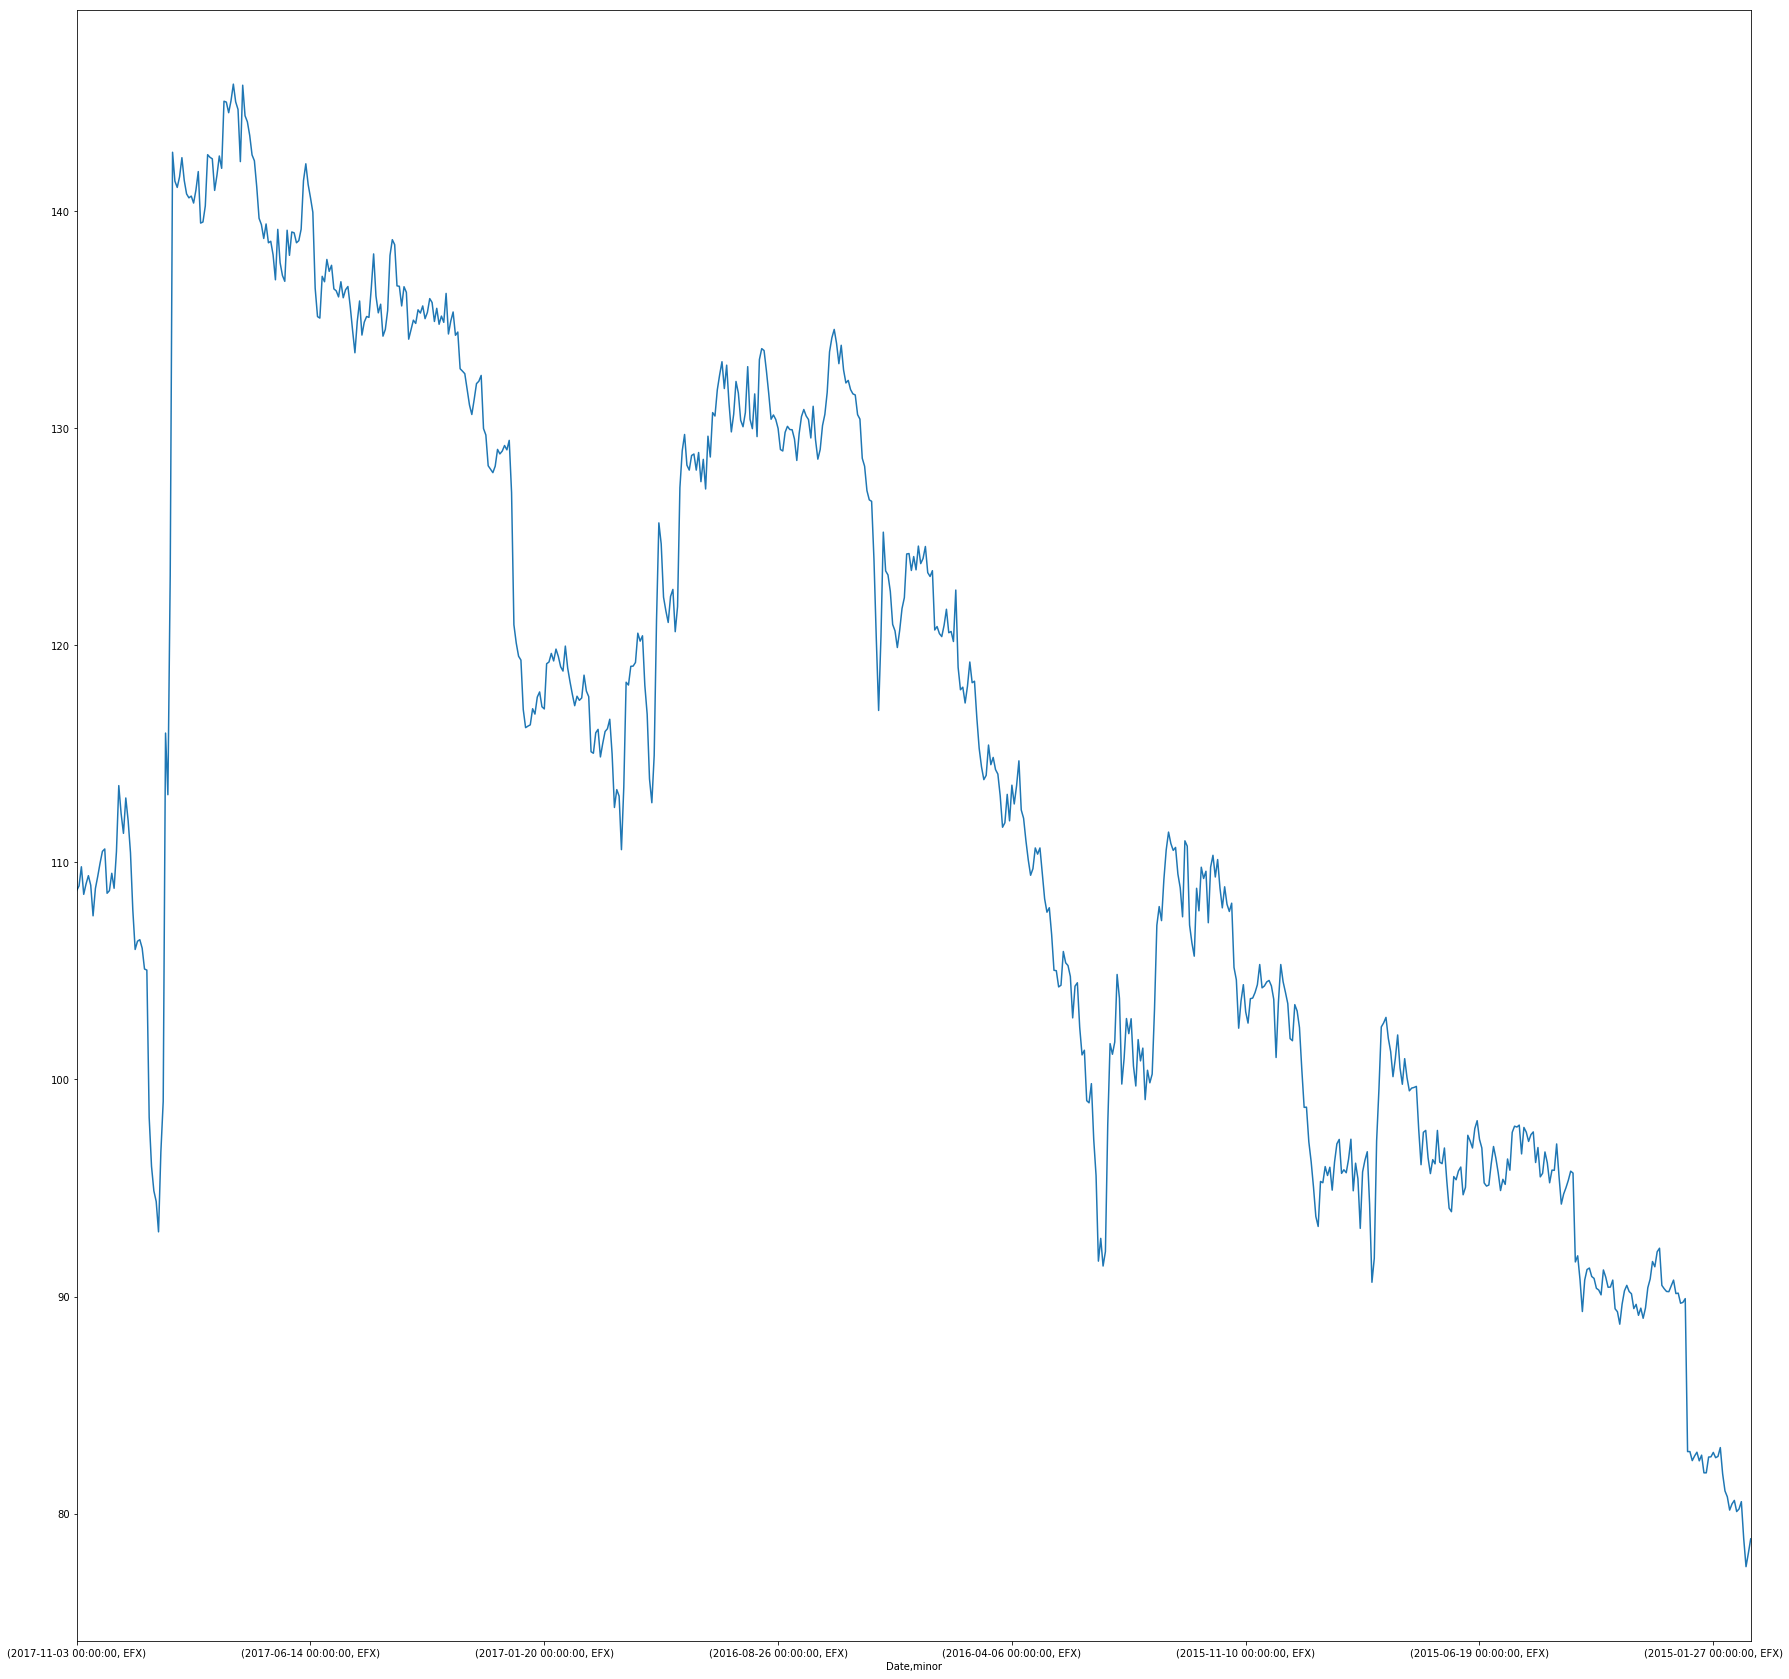

In [101]:
df4['Adj Close'].plot()
#plt.figure(figsize=(30,50))
plt.rcParams["figure.figsize"] = (20,20)
plt.show()


The above visual is an Adjusted Closing Price of Equifax from 2015 to 2017. We can see clearly that there has been a major
fluctuation in the closing price in Sep 2017, right after the major Data Breach incident at Equifax. This confirms our claim
that Financial Markets do affect Data Breaches

# Saving Equifax Results to a file

In [62]:
df4.to_csv('Lab_7Equifax.csv',encoding='utf-8')

# Accessing Anthem Stock Price

In [107]:
data_price=['ANTM']

start = datetime.datetime(2012, 1, 1)

end = datetime.datetime.today()

g = web.DataReader(data_price, 'yahoo', start, end)
    
df5 = g.to_frame()

In [108]:
df5.head()

,,Adj Close,Close,High,Low,Open,Volume
Date,minor,,,,,,
2017-11-03,ANTM,211.800003,211.800003,213.449997,209.250000,210.660004,1120900.0
2017-11-02,ANTM,210.589996,210.589996,211.360001,208.399994,210.199997,1087500.0
2017-11-01,ANTM,209.529999,209.529999,210.979996,208.669998,210.029999,1857800.0
2017-10-31,ANTM,209.210007,209.210007,210.000000,206.979996,209.660004,1266400.0
2017-10-30,ANTM,209.460007,209.460007,212.070007,208.639999,211.000000,1442900.0


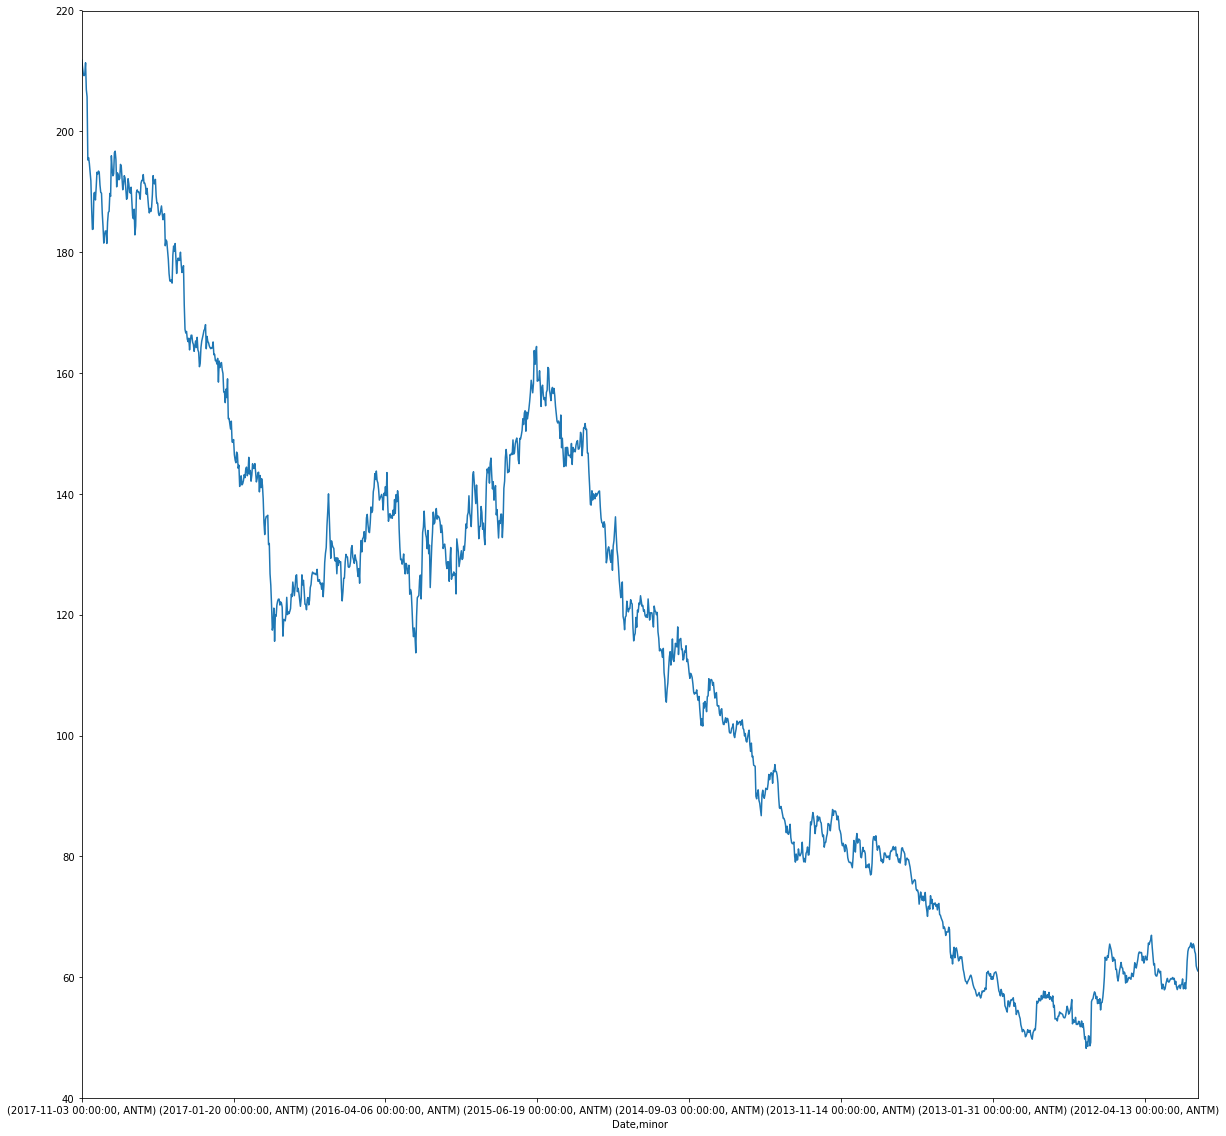

In [109]:
df5['Adj Close'].plot()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

The above visual is an Adjusted Closing Price of Anthem from 2012 to 2017. We can see clearly that there has been a major
fluctuation in the closing price from 2015 to 2017, right after the major Data Breach incident at Anthem. This confirms our claim
that Financial Markets do affect Data Breaches

# Saving Anthem Results to a file

In [110]:
df5.to_csv('Lab_7Anthem.csv',encoding='utf-8')

In [40]:
import urllib

def get_symbol(name):

    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(name)
    #http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=apple®ion=1&lang=en"
    jsonurl = urllib.request.urlopen(url)
    data = json.loads(jsonurl.read())
    
    print (data['ResultSet']['Result'])
    #result = request.get(url)
    #print (result)
#for x in result['ResultSet']['Result']:
#    print (x)
          #  if x['name'] == name :
          #      if (x['exchDisp']=='NYSE'or x['exchDisp']=='NASDAQ'):
          #          if x['typeDisp']=='Equity':
          #              return x['symbol']

##company = get_symbol("twitter")
##print(company)
#ticker=[]

##for xyz in cmp_name:
##  ticker = get_symbol(xyz)
##    print(ticker)
    
#for xyz in cmp_name:
   # ticker.append(get_symbol(xyz))
    
    
#print(ticker)
                  # print (x)


In [41]:
import urllib.request

#json_data = urllib.request.urlopen('http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=apple&region=1&lang=en')

def get_symbol(name):
    
    my_list = df1.Entity.tolist()
    #print(my_list)
    
    for xyz in my_list:
        url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query=@&region=1&lang=en".format(name)
        url = url.replace("@",str(xyz))
        url = url.replace (" ","%20")
        print(url)

        # returns a utf-8 'bytes' object which still can't be processed
        #json_data = urllib.request.urlopen(url).read()

        # decode into a string
        #str_json_data = json_data.decode('utf-8')

        #json_dict = json.loads(str_json_data)  
    
        

In [42]:

for x in df.iloc[ :2].Entity:
     print(x)
#df.loc[: ].Entity

0
AOL


In [43]:
my_list = df1.Entity.tolist()
for xyz in my_list:
    print (xyz)


AOL
Automatic Data Processing
Ameritrade Inc.
Citigroup
Cardsystems Solutions Inc. 
Hewlett Packard
Countrywide Financial Corp
KDDI
T-Mobile, Deutsche Telecom
AOL
US Dept of Vet Affairs
Texas Lottery
City and Hackney Teaching Primary Care Trust
Gap Inc
Compass Bank
Monster.com
Driving Standards Agency
Driving Standards Agency,
Hannaford Brothers Supermarket Chain
TD Ameritrade
Fidelity National Information Services
Dai Nippon Printing
UK Revenue & Customs
TK / TJ Maxx
Service Personnel and Veterans Agency (UK)
Stanford University
UK Home Office
AT&T
Starbucks
RBS Worldpay
Jefferson County
UK Ministry of Defence
University of Miami
University of Utah Hospitals & Clinics
Norwegian Tax Authorities
Data Processors International
Chile Ministry Of Education
GS Caltex
BNY Mellon Shareowner Services
Auction.co.kr
US Dept of Defense
US National Guard
University of California Berkeley
Affinity Health Plan, Inc.
Virginia Prescription Monitoring Program
Network Solutions
Blue Cross Blue Shield of 

# Accessing the ticker sybols & historical stock price of publicly listed companies

In [115]:
print(pricing_data_tickers)

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 164 (major_axis) x 19 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2004-01-01 00:00:00 to 2017-08-01 00:00:00
Minor_axis axis: AAPL to VKMMX


# Transfering the ticker contents to a dataframe

In [49]:
closing_price = pricing_data_tickers.ix['Close']

# Checking the top 10 rows of our new ticker dataset named closing_price

In [50]:
closing_price.head(10)

,AAPL,ADPCX,AOLAX,ATGYX,CEXAX,DGXCX,FBIOX,FISMX,FLINGX,GPNCX,GPSTX,HDP,HRTVX,IRSMX,MSPYX,NHSIX,SBHSX,TGTRX,VKMMX
Date,,,,,,,,,,,,,,,,,,,
2004-01-01,1.611429,12.78,NaN,25.740000,NaN,NaN,53.320000,19.500000,NaN,NaN,NaN,NaN,53.730000,NaN,NaN,NaN,NaN,NaN,14.89
2004-02-01,1.708571,12.82,NaN,26.100000,NaN,NaN,55.389999,20.170000,NaN,NaN,NaN,NaN,54.720001,NaN,NaN,NaN,NaN,NaN,15.14
2004-03-01,1.931429,12.84,NaN,26.510000,NaN,NaN,56.599998,20.840000,NaN,NaN,NaN,NaN,54.020000,NaN,NaN,NaN,NaN,NaN,14.94
2004-04-01,1.841429,12.69,NaN,25.600000,NaN,NaN,58.560001,20.160000,NaN,NaN,NaN,NaN,51.869999,NaN,NaN,NaN,NaN,NaN,14.51
2004-05-01,2.004286,12.63,NaN,26.309999,NaN,NaN,58.549999,19.940001,NaN,NaN,NaN,NaN,51.669998,NaN,NaN,NaN,NaN,NaN,14.40
2004-06-01,2.324286,12.61,NaN,26.530001,NaN,NaN,58.779999,20.860001,NaN,NaN,NaN,NaN,53.279999,NaN,NaN,NaN,NaN,NaN,14.42
2004-07-01,2.310000,12.64,NaN,24.980000,NaN,NaN,52.049999,19.670000,NaN,NaN,NaN,NaN,49.119999,NaN,NaN,NaN,NaN,NaN,14.55
2004-08-01,2.463571,12.68,NaN,24.889999,NaN,NaN,52.619999,19.709999,NaN,NaN,NaN,NaN,46.200001,NaN,NaN,NaN,NaN,NaN,14.76
2004-09-01,2.767857,12.66,NaN,25.730000,NaN,NaN,54.830002,20.219999,NaN,NaN,NaN,NaN,48.250000,NaN,NaN,NaN,NaN,NaN,14.81


# Filling the null values with zero

In [121]:
closing_price.fillna(0).head(10)

,AAPL,ADPCX,AOLAX,ATGYX,CEXAX,DGXCX,FBIOX,FISMX,FLINGX,GPNCX,GPSTX,HDP,HRTVX,IRSMX,MSPYX,NHSIX,SBHSX,TGTRX,VKMMX
Date,,,,,,,,,,,,,,,,,,,
2004-01-01,1.611429,12.78,0.0,25.740000,0.0,0.0,53.320000,19.500000,0.0,0.0,0.0,0.0,53.730000,0.0,0.0,0.0,0.0,0.0,14.89
2004-02-01,1.708571,12.82,0.0,26.100000,0.0,0.0,55.389999,20.170000,0.0,0.0,0.0,0.0,54.720001,0.0,0.0,0.0,0.0,0.0,15.14
2004-03-01,1.931429,12.84,0.0,26.510000,0.0,0.0,56.599998,20.840000,0.0,0.0,0.0,0.0,54.020000,0.0,0.0,0.0,0.0,0.0,14.94
2004-04-01,1.841429,12.69,0.0,25.600000,0.0,0.0,58.560001,20.160000,0.0,0.0,0.0,0.0,51.869999,0.0,0.0,0.0,0.0,0.0,14.51
2004-05-01,2.004286,12.63,0.0,26.309999,0.0,0.0,58.549999,19.940001,0.0,0.0,0.0,0.0,51.669998,0.0,0.0,0.0,0.0,0.0,14.40
2004-06-01,2.324286,12.61,0.0,26.530001,0.0,0.0,58.779999,20.860001,0.0,0.0,0.0,0.0,53.279999,0.0,0.0,0.0,0.0,0.0,14.42
2004-07-01,2.310000,12.64,0.0,24.980000,0.0,0.0,52.049999,19.670000,0.0,0.0,0.0,0.0,49.119999,0.0,0.0,0.0,0.0,0.0,14.55
2004-08-01,2.463571,12.68,0.0,24.889999,0.0,0.0,52.619999,19.709999,0.0,0.0,0.0,0.0,46.200001,0.0,0.0,0.0,0.0,0.0,14.76
2004-09-01,2.767857,12.66,0.0,25.730000,0.0,0.0,54.830002,20.219999,0.0,0.0,0.0,0.0,48.250000,0.0,0.0,0.0,0.0,0.0,14.81


In [118]:
closing_price.to_csv('Stockz_PriceData.csv',index=True,encoding='utf-8')

# Inserting the ticker symbols column in the dataset

In [119]:
frame_tickers= pd.DataFrame(tickers)
frame_tickers['Symbol']=pd.Series(tickers,index=frame_tickers.index)
df1['Symbol']=frame_tickers['Symbol']
df1 = df1.dropna(axis=0,how='any')
df1.head()

,Entity,Year,Records Lost,Organization,Method of Leak,Sensitivity,Unnamed: 6,Unnamed: 7,Unnamed: 8,Symbol


In [120]:
df1.to_csv('Lab_3Entity_Sysmbol.csv',encoding='utf-8')

# Tableau Visualizations

https://public.tableau.com/profile/muhammad.adeel3420#!/vizhome/Lab_7FinancialMarketsPunishDataBreaches/EquifaxBollingerBands

The above visuals confirm the fact that financial markets did affect the data breaches in the specific cases of Equifax and Anthem , both of which have been used as examples to plot Candlestick charts and Bollinger Bands to analyze the severity of data breaches on the Average stock price and Moving Averages
